# Final Report

## Introduction

While not the most dangerous, alcohol is one of the most popular drugs in the world. Its consumption is not only popularized but normalized in modern society, regardless of any negative effects it may have. Many mental factors, such as impulsiveness and neuroticism, can affect how often one consumes alcohol. Furthermore, minimum legal ages fail to stop children and young teens from consuming alcohol. The question we aimed to answer in this project is “How can we predict the frequency of alcohol consumption based on certain aspects of an individual’s personality?” The dataset we are using to answer this question is a quantified drug consumption dataset. The dataset contains information about 1885 unique individuals. Each entry contains 12 attributes such as personality measurements, age, ethnicity, and etc; all of which are quantified and standardized. In addition, the dataset contains information regarding these individuals’ use of 18 drugs, ranging from chocolate to heroin, and one fictitious drug (semeron) to filter out false claims. Each value in the drug columns reflects the recency of an individual’s use of a certain drug, ranging from “Never Used” to “Used in Last Day.”

The dataset contains 32 columns. Each column corresponds to a specific attribute for each participant. The values in all columns were originally categorical but have been quantified to real numbers in the dataset. The level of consumption, however, for each drug is categorical and contains the following classes:

- CL0: Never used
- CL1: Used over a decade ago
- CL2: Used in last decade
- CL3: Used in last year
- CL4: Used in last month
- CL5: Used in last week
- CL6: Used in last day

Alongside the legal and illegal drugs in the dataset, there is a fictitious drug called Semeron which was used in the survey to identiy over-claimers. Here is information regarding all the columns:

- ID 
- Age (18-65+)
- Gender
- Education (level of education)
- Country (country of residence)
- Ethnicity (ethnicity)
- Nscore (measurement of neuroticism)
    + 12 to 60 (actual)
    + -3.46436 to 3.27393 (quantified)
- Escore (measurement of extraversion) 
    + 16 to 59 (actual)
    + -3.27393 to 3.27393 (quantified)
- Oscore (openness to experience)
    + 24 to 60 (actual)
    + -3.27393 to 2.90161 (quantified)
- Ascore (measurement of agreeableness)
    + 12 to 60 (actual)
    + -3.46436 to 3.46436 (quantified)
- Cscore (measurement of conscientiousness)
    + 17 to 59 (actual)
    + -3.46436 to 3.46436 (quantified)
- IScore (measurement of impulsiveness)
    + no actual values were provided
    + -2.55524 to 2.90161 (quantified)
- SS (measurement of sensation seeking)
    + no actual values were provided
    + -2.07848 to 1.92173 (quantified)
- Alcohol (level alcohol consumption)
- Amphetamines (level of amphetamines consumption)
- AmylNitrate (level of amyl nitrite consumption)
- Benzodiazepine (level of benzodiazepine consumption)
- Caffeine (level of caffeine consumption)
- Cannabis (level of cannabis consumption)
- Chocolate (level of chocolate consumption)
- Cocaine (level of cocaine consumption)
- Crack (level of crack consumption)
- Ecstasy (level of ecstasy consumption)
- Heroin (level of heroin consumption)
- Ketamine (level of ketamine consumption)
- LegalHighs (level of legal highs consumption) 
- LSD (level of LSD consumption)
- Methadone (level of methadone consumption) 
- Mushrooms (level of magic mushrooms consumption) 
- Nicotine (level of nicotine consumption)
- Semeron (level of fictitious drug Semeron consumption) 
- VSA (level of volatile substance abuse) 

## Methods and Results

### Overview:

In order to perform our analysis, we took the following steps: 

1. **Reading and Wrangling:** We read the data from its original source online, assigned relevant names to the unnamed columns, removed variables we deemed irrelevant to our analysis, and filtered out over-claiming observations
2. **Splitting:** We split our data into training and testing sets to perform our analysis
3. **Choosing Predictors:** We combined forward selection, predictor distribution, and external research to choose the three predictors we thought fit our analysis best
4. **Building and Tuning:** We built and tuned our k-nn classifier using our created recipe and 5-fold cross-validation
5. **Classification:** We used the classifier on the testing set to perform our analysis
6. **Results and Analysis:** We visualized the results and analyzed what it meant

### Loading Libraries

In [2]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(forcats)
library(RColorBrewer)
library(ggplot2)
library(knitr)
options(repr.matrix.max.rows = 7) # limits the outputs of data frames to 7 rows (or observations)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Reading the Data
We read the drugs consumption quantified dataset directly from the URL and saved it to a dataframe called "drugs_data". Since the columns in the dataset have no headings, we set `col_names` to `FALSE`.

In [3]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
drugs_data <- read_csv(url, col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Wrangling and Cleaning
- According to the website containing the dataset, it contains no missing values, and so it is unnecessary to check for them.
- We renamed the columns to names that corresponded to the information they contain.
- Each row in the data set corresponds to a single participant (observation), each column to a single variable (attribute) and each cell to a single value. Thus, our dataset is in tidy format.
- We removed every variable we deemed unnecessary for our analysis. This includes all other drugs other than alcohol and the fake drug Semeron, and all identifiers other than age.
- Since the purpose of the `Semeron` column is to detect over-claimers, in order to accurately perform our analysis, we had to filter out all observations that have claimed to ever use it (observations with a value other than `CL0` in the `Semeron` column.
- We used `mutate` and `as_factor` functions to ensure that our response variable `Alcohol` is treated as factor which is neccesary for our classficiation model.

In [6]:
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "NScore", "EScore", "OScore", "AScore", 
                          "CScore", "IScore", "SS", "Alcohol", "Amphetamines", "AmylNitrate", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine",
                          "Crack", "Ecstacy", "Heroin", "LegalHighs", "LSD", "Methadone", "Mushrooms", "Nicotine", "Semeron", "VSA")

alcohol_data <- select(drugs_data, Age, NScore , EScore, OScore, AScore,
                                IScore, CScore, SS, Semeron, Alcohol)

alcohol_data_filtered <- alcohol_data |>
                         filter(Semeron == "CL0") |>
                         select(-Semeron)

alcohol_clean <- alcohol_data_filtered |>
                 mutate(Alcohol = as_factor(Alcohol))
alcohol_clean

Age,NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6
0.49788,-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,-0.52593,CL5
1.82213,-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,-0.52593,CL5
1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,CL5
2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,CL5
-0.95197,-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,1.92173,CL5


### Exploratory Data Analysis
After cleaning the dataset, we're left with 428 observations. From this point on, we will be using 75% of our data set and we will use the rest 25% only to test the accuracy of our classifier. Thus, we split our dataset into training and testing sets using the `initial_split` function. We used the `set.seed()` function for reproducible results, as `initial_split()` splits the dataframe randomly

In [7]:
set.seed(69)
alcohol_split <- initial_split(alcohol_clean, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)

#### Dataset Summary
We sumarized our dataset in two ways:
- A table that reports the number of observations for each class in `Alcohol`
- A table that reports the mean of all personality measurements grouped by the `Alcohol` variable.

In [8]:
alcohol_count <- group_by(alcohol_train, Alcohol) |>
                 summarize(n = n())
alcohol_count

Alcohol,n
<fct>,<int>
CL6,66
CL5,137
CL4,48
CL0,16
CL3,35
CL1,6
CL2,11


- Using the `group_by`, `summarize`, and `n()` functions, we obtained the count of observations for each class in `Alcohol` in the above table.
- The number of observations are distributed unevenly across all levels of alcohol consumption which means that our data set is not balanced. The maximum number of observations are in `CL5` (used in last week) while the mininum number of observations are in `CL1` (used over a decade ago). 

In [ ]:
alcohol_means <- alcohol_train |>
                 group_by(Alcohol) |>
                 summarize(NScore_Mean = mean(NScore),
                           EScore_Mean = mean(EScore),
                           OScore_Mean = mean(OScore),
                           AScore_Mean = mean(AScore),
                           IScore_Mean = mean(IScore),
                           CScore_Mean = mean(CScore))
alcohol_means

Alcohol,NScore_Mean,EScore_Mean,OScore_Mean,AScore_Mean,IScore_Mean,CScore_Mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CL6,-0.1070455,0.0003836364,-0.2337532,0.20108061,-0.2593374,0.33426621
CL5,-0.2104826,0.1737224088,-0.3266285,0.33174526,-0.3653848,0.39946504
CL4,-0.2381323,-0.0304225000,-0.3216004,0.37365021,-0.2580952,0.35648354
CL0,0.1190381,0.1158106250,0.0469375,0.02410312,-0.3413656,0.23926312
CL3,-0.2083551,-0.1460434286,-0.4620551,-0.05292543,-0.4505683,-0.13884057
CL1,-0.5894517,0.4553266667,-0.9030767,0.75377667,-0.2583617,1.11948667
CL2,0.5474755,-0.5713127273,-0.6111855,-0.25231273,-0.4266245,0.02889545


- With the use of `group_by`, `summarize` and `mean()` functions, we were able to obtain the means of all potential predictor variables for each class in `Alcohol` in the above table.
- There is no clear distinction in these values between the classes in `Alcohol`. However, there is a pattern in the means for impulsivity as `IScore_Mean` suggests that the means for `IScore` across all classes is very close to its minimum value.

#### Visual Representation
- We displayed the distribution of the potential predictors using histograms since we are dealing with numerical data.
- First, we needed to modify our data so that we could compare the distributions of all potential predictors next to each other using `facet_wrap`. To do this, we used the `pivot_longer` function so that all the potential predictors fit under one column `predictors`, and their corresponding values under the column `values`.

Age,Alcohol,Potential_predictors,Values
<dbl>,<fct>,<chr>,<dbl>
1.82213,CL3,NScore,0.04257
1.82213,CL3,EScore,-0.69509
1.82213,CL3,OScore,-1.11902
1.82213,CL3,AScore,-0.45321
⋮,⋮,⋮,⋮
-0.07854,CL6,IScore,0.52975
-0.07854,CL6,CScore,-0.40581
-0.07854,CL6,SS,0.40148


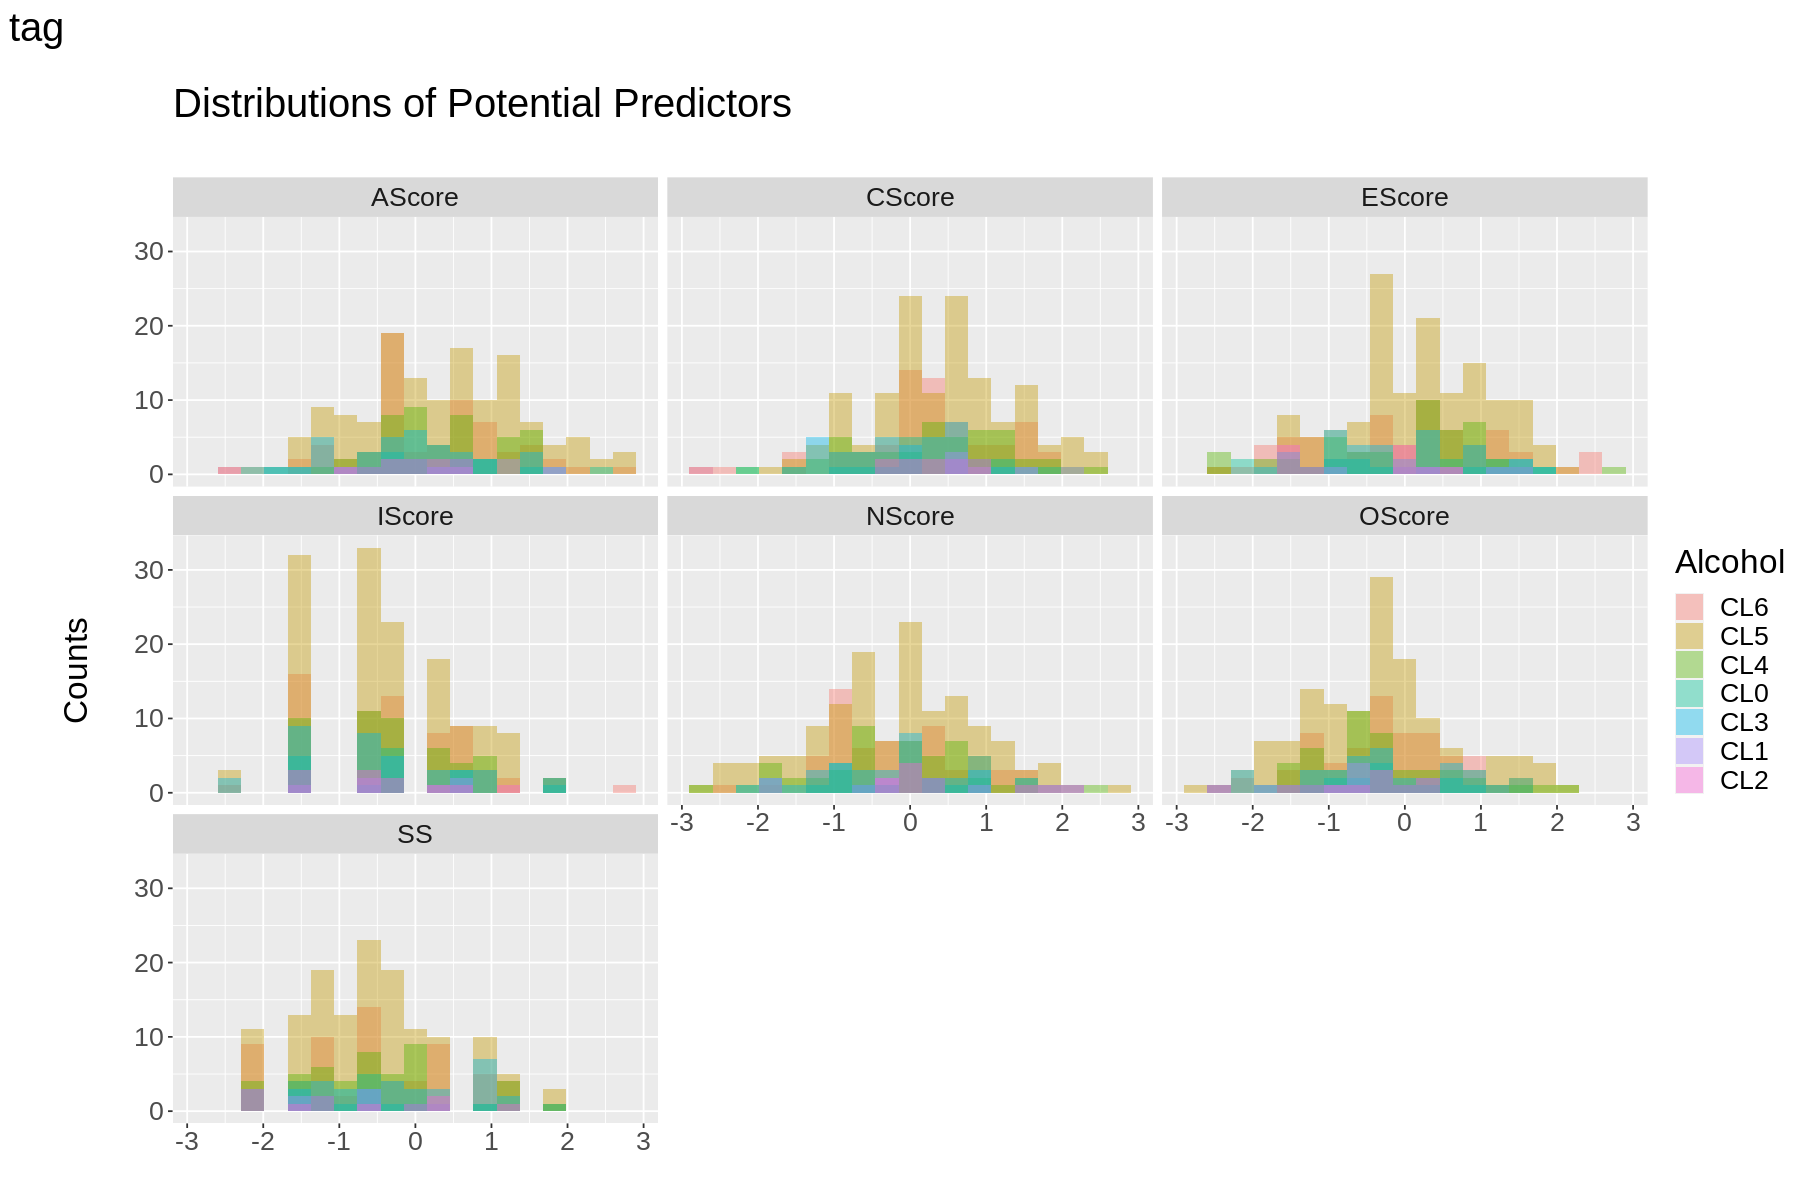

In [13]:
options(repr.plot.width = 15, repr.plot.height = 10)

alcohol_longer <- alcohol_train |> 
                pivot_longer(cols = NScore:SS,
                             names_to = "Potential_predictors",
                             values_to = "Values")
alcohol_longer

alcohol_plot <- alcohol_longer |>
    ggplot(aes(x = Values, fill = Alcohol, tag = "Figure")) + 
    geom_histogram(position = 'identity', bins = 20, alpha = 0.4) +
    labs(x = "",
         y = "Counts\n",
         title = "\nDistributions of Potential Predictors\n") +
    facet_wrap(vars(Potential_predictors)) +
    theme(text = element_text(size = 20)) 
alcohol_plot

- Looking at the plots above, 
......

## Building the Classifier
<!-- - To build our classification model, we use  the training set, `alcohol_train` and test it on the testing set`alcohol_test`. -->
1. We defined our predictors and our target variable using the `recipe()` function. Scaling and centering are implemented within the recipe as well.
2. To build our classification model, we used the `nearest_neighbor()` function and set `neighbors = tune()` to the k-value with the highest accuracy.
3. We performed 5-fold cross-validation 
4. We created a workflow to combine the recipe, the model and apply the `tune_grid()` function for the cross validation. 
5. We used `collect_metrics()` to collect the accuracy for each value of k and plotted them against the neighbors to visually identify the most optimal k-value.

In [14]:
set.seed(6699)

alcohol_recipe <- recipe(Alcohol ~ IScore + SS + EScore, data = alcohol_train) |>
                  step_scale(all_predictors()) |> 
                  step_center(all_predictors())

alcohol_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Alcohol)

# testing k-values ranging from 1 to 50
gridvals <- tibble(neighbors = seq(1, 50))

alcohol_results <- workflow() |> 
    add_recipe(alcohol_recipe) |> 
    add_model(alcohol_spec) |> 
    tune_grid(resamples = alcohol_vfold, grid = gridvals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy")

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'CL1'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'CL2'
  Computation will proceed by ignoring those levels.



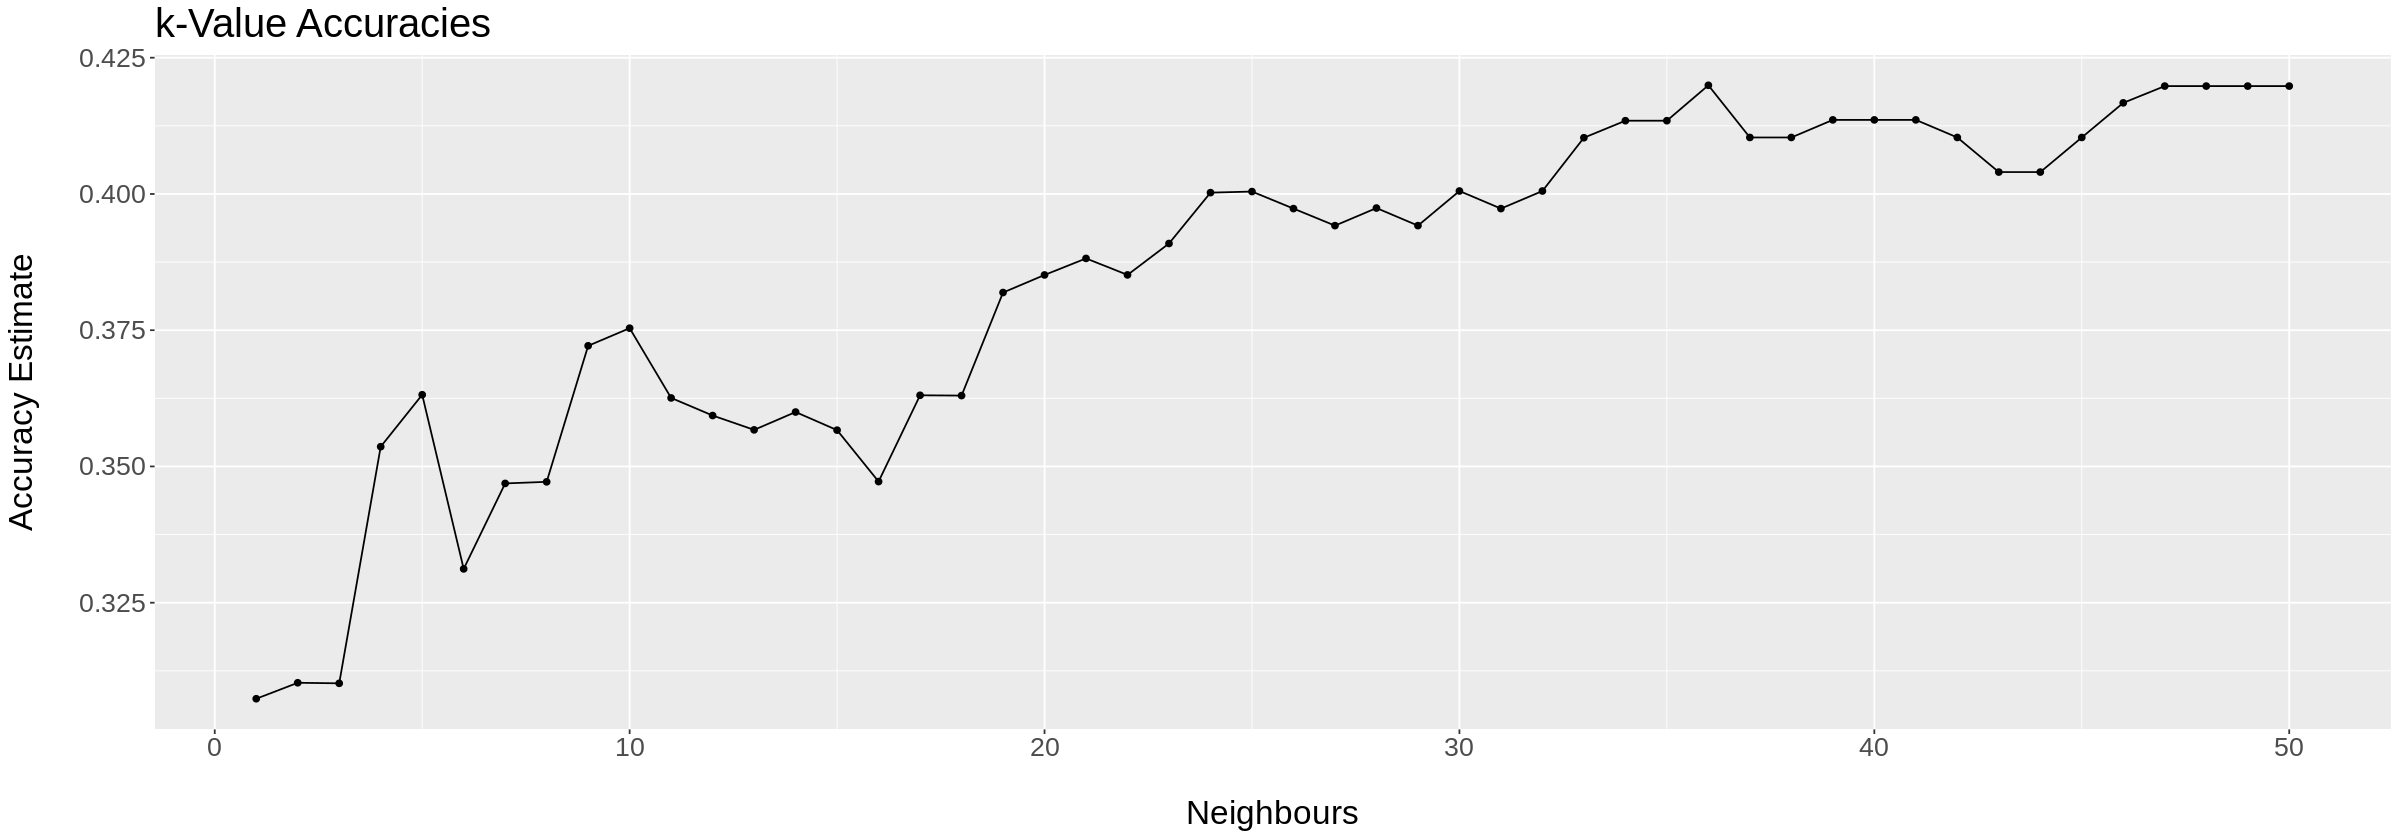

In [16]:
options(repr.plot.width = 20, repr.plot.height = 7)

accuracy_plot <- alcohol_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    # geom_vline(xintercept = 36, colour = "blue") +
    # geom_point(aes(x = 36, y = ky), size = 4, colour = "red") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "k-Value Accuracies") +
    theme(text = element_text(size = 20))

accuracy_plot

Looking at the plot, it's difficult to distinguish the exact k-value with the highest accuracy, so we created a table showing accuracies in descending order for each k-value.

In [10]:
top_k <- alcohol_results |>
         select(neighbors, mean) |>
         arrange(desc(mean))
top_k

neighbors,mean
<int>,<dbl>
36,0.4199415
47,0.4197927
48,0.4197927
49,0.4197927
⋮,⋮
2,0.3103067
3,0.3102059
1,0.3073772


Although the highest accuracy occurs when the number of neighbors is 36, looking at the plot above, the values around 36 slighly vary. However, when the number of neighbors is 48, the values around it are stable and have the same accuracy. As a result, **48** is the most optimal k-value.

In [14]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 48) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_fit <- workflow() |>
  add_recipe(alcohol_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = alcohol_train)

### Results

In [15]:
alcohol_predictions <- predict(alcohol_fit, alcohol_test) |> 
    bind_cols(alcohol_test)

alcohol_predictions

alcohol_acc <- alcohol_predictions |> 
    metrics(truth = Alcohol, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

alcohol_acc

.pred_class,Age,NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
CL5,0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6
CL5,1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,CL6
CL5,0.49788,0.04257,-1.50796,-0.71727,0.28783,0.19268,1.30612,-0.52593,CL6
CL5,0.49788,-0.24649,-0.57545,-0.17779,-0.01729,-0.21712,-1.51840,-0.21575,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CL5,-0.95197,-0.79151,0.32197,1.88511,-1.07533,-0.21712,-0.78155,0.40148,CL3
CL5,-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,CL5
CL5,2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,CL5


.metric,.estimate
<chr>,<dbl>
accuracy,0.4311927


The accuracy of our classifier turned out to be about 43% which is not very good. There are a number of reasons why our classifier could not reach 

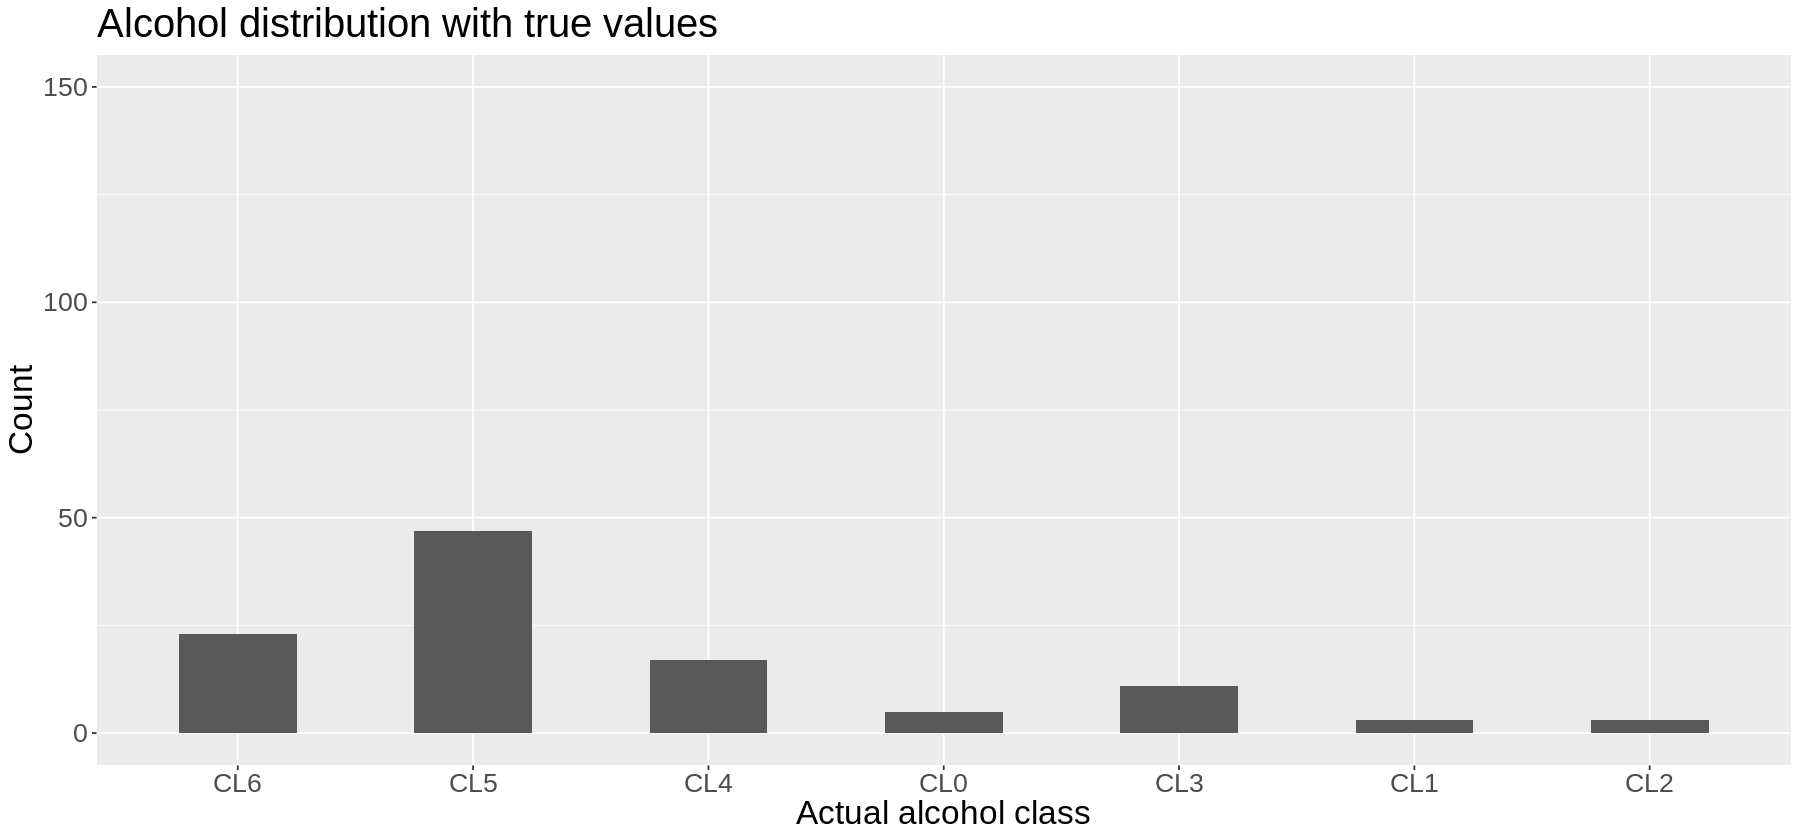

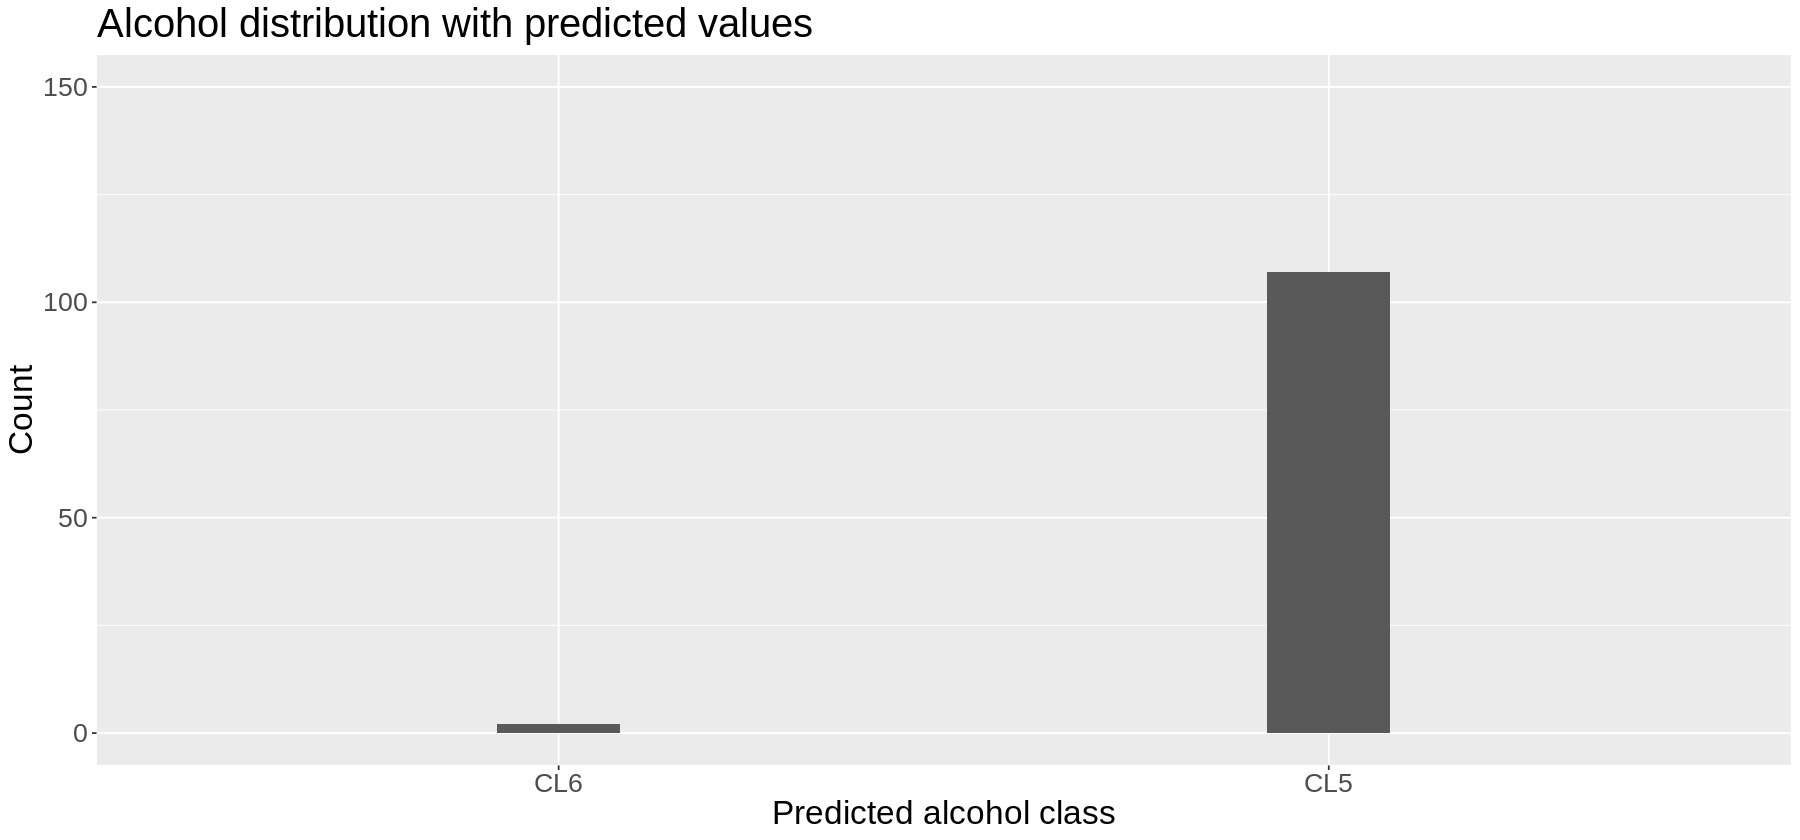

In [28]:
options(repr.plot.width = 15, repr.plot.height = 7)

# result_plot_actual <- ggplot(alcohol_predictions, aes(x = Alcohol)) +
#                         geom_bar(width = 0.5) +
#                         labs(x = "Actual alcohol class",
#                              y = "Count",
#                              title = "Alcohol distribution with true values") +
#                         ylim(0,150) +
#                         theme(text = element_text(size = 20))

# result_plot_pred <- ggplot(alcohol_predictions, aes(x = .pred_class)) +
#                         geom_bar(width = 0.16) +
#                         labs(x = "Predicted alcohol class",
#                              y = "Count",
#                              title = "Alcohol distribution with predicted values") +
#                         ylim(0,150) +
#                         theme(text = element_text(size = 20))

# result_plot_actual
# result_plot_pred

## Discussion: